In [43]:
import sys
import spacy
import nltk
import pandas as pd
from itertools import combinations
from textblob import TextBlob
from sklearn.metrics.pairwise import cosine_similarity
import string
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import RegexpTokenizer,word_tokenize
from nltk.corpus import stopwords
stop_words = stopwords.words()
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet, words
import re
import itertools
from gensim.parsing.preprocessing import remove_stopwords
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF,LatentDirichletAllocation,TruncatedSVD
from nltk import pos_tag
from wordcloud import WordCloud
from string import punctuation
from sklearn.metrics.pairwise import cosine_similarity, linear_kernel
import warnings
warnings.filterwarnings('ignore')
#nltk.download('wordnet')
#nltk.download('punkt')
#nltk.download('stopwords')
#nltk.download('words')
#nltk.download('averaged_perceptron_tagger')

In [44]:
df=pd.read_csv('netflix-final.csv')

In [45]:
df=df.drop(['Unnamed: 0'],axis=1)

In [46]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,clean_description,listed_in_clean,cast_clean,combined,description2
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,future elite inhabit island paradise far crowd...,international shows dramas sci-fi fantasy,joão miguel bianca comparato michel gomes rodo...,future elite inhabit island paradise far crowd...,"['island', 'slums', 'join', 'saved', 'inhabit'..."
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,devastating earthquake city trapped life wait ...,dramas international movies,demián bichir héctor bonilla oscar serrano aza...,devastating earthquake city trapped life wait ...,"['earthquake', 'wait', 'alive', 'city', 'devas..."
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",army recruit found dead fellow forced confront...,horror movies international movies,tedd chan stella chung henley hii lawrence koh...,army recruit found dead fellow forced confront...,"['island', 'secret', ""'s"", 'haunting', 'jungle..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",world hide fear dangerous exterminate brave ne...,action adventure independent movies sci-fi fan...,elijah wood john c. reilly jennifer connelly c...,world hide fear dangerous exterminate brave ne...,"['robots', 'dangerous', 'machines', 'rag-doll'..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,brilliant group become intent swindling millio...,dramas,jim sturgess kevin spacey kate bosworth aaron ...,brilliant group become intent swindling millio...,"['brilliant', 'become', 'playing', 'experts', ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,civil war family left grief little search,dramas international movies,imad creidi antoinette turk elias gergi carmen...,civil war family left grief little search dram...,"['family', ""'s"", 'zozo', 'left', 'means', 'sea..."
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,scrappy poor boy way tycoon family facing fear...,dramas international movies music musicals,vicky kaushal sarah-jane dias raaghav chanana ...,scrappy poor boy way tycoon family facing fear...,"['family', ""'s"", 'dysfunctional', 'poor', 'tyc..."
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",documentary south rapper nasty stage street ci...,documentaries international movies music musicals,nasty c,documentary south rapper nasty stage street ci...,"['introducing', 'hits', 'sounds', ""'s"", 'city'..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Real

In [47]:
df['listed_in2'] = df.apply(lambda row: nltk.word_tokenize(row['listed_in']), axis=1)

In [78]:
def get_lst(label):
    new_lst = [x.split(', ') for x in df.dropna(subset=[label])[label].tolist()]
    new_lst = list(itertools.chain(*new_lst))
    return new_lst



In [79]:
countries=get_lst('country')

In [80]:
country_counts = pd.DataFrame(Counter(countries).most_common()[:10], columns=['Country', 'Count'])

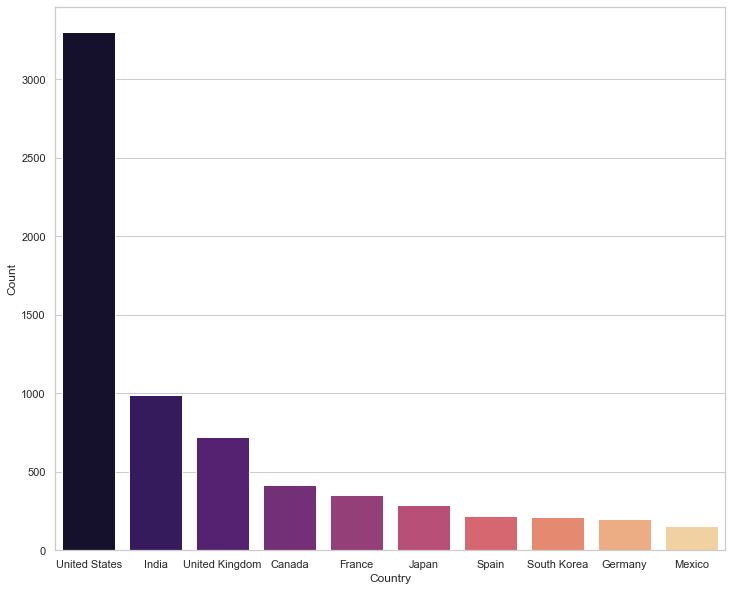

In [84]:
plt.figure(figsize=(12,10))
sns.set_style("whitegrid")
ax=sns.barplot(y='Count', x='Country', data=country_counts, palette='magma', orient='v')

In [82]:
categories=get_lst('listed_in')

In [83]:
category_counts = pd.DataFrame(Counter(categories).most_common()[:10], columns=['Categories', 'Count'])

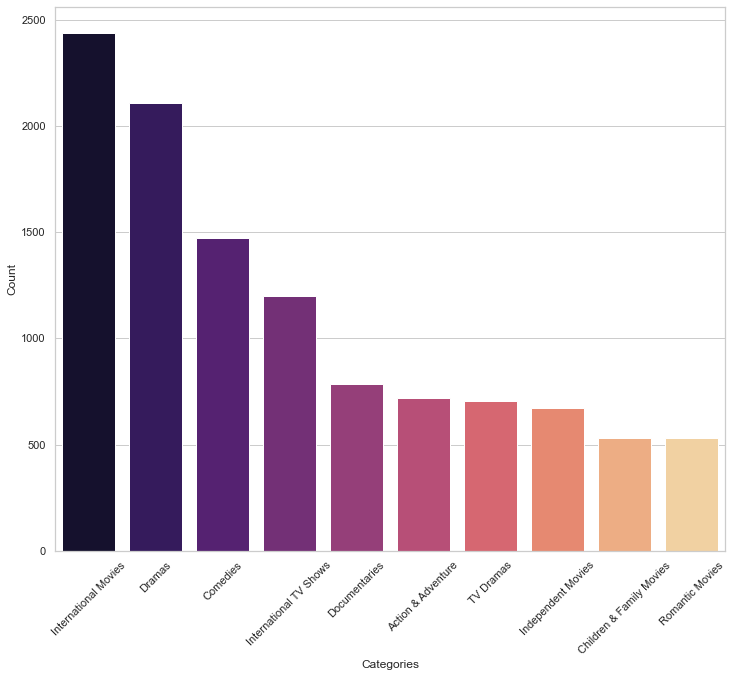

In [87]:
plt.figure(figsize=(12,10))
sns.set_style("whitegrid")
ax=sns.barplot(y='Count', x='Categories', data=category_counts, palette='magma', orient='v')
plt.xticks(rotation=45);

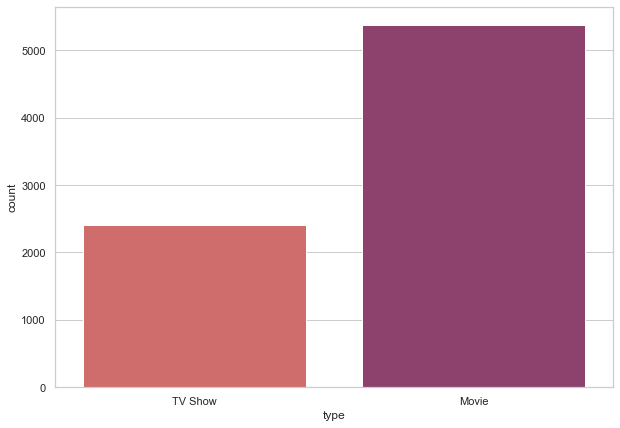

In [94]:
plt.figure(figsize=(10,7))
sns.set(style='whitegrid')
ax = sns.countplot(x='type', data=df, palette='flare')

In [105]:
ratings_lst=get_lst('rating')

In [106]:
ratings_counts = pd.DataFrame(Counter(ratings_lst).most_common()[:10], columns=['Ratings', 'Count'])

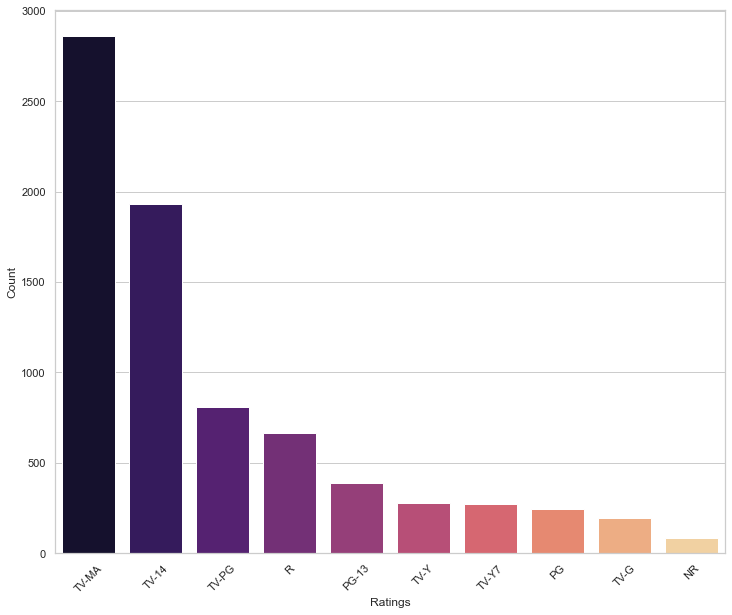

In [108]:
plt.figure(figsize=(12,10))
sns.set_style("whitegrid")
ax=sns.barplot(y='Count', x='Ratings', data=ratings_counts, palette='magma', orient='v')
plt.xticks(rotation=45);